CUNYSPS DATA 620 Final Project

Author: Jonathan Hernandez

Examining dataset of R answers from stackflow provided by Kaggle.com

Summary:

- This project is about examing answers of users who answer answers questions that use the 'R' tag. This dataset is up to date up to September 24th 2017. While there are 3 datasets, questions, answers and tags, for this project, I will soley look at the answers dataset.

- Kaggle website of dataset: https://www.kaggle.com/stackoverflow/rquestions

- Download location: https://www.kaggle.com/stackoverflow/rquestions/downloads/rquestions.zip/3

- Two questions to be investigated and ask is

    1. Is there any difference in frequency distribution between accepted answers and not accepted such as types of words used?
    
    2. Who are the top users with the most accepted answers?


- I will use Text Processing/NLP to answer question 1. and use network analysis to answer question 2.

In [1]:
import numpy as np
import scipy.stats # t-test
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import nltk
import re
import zipfile

In [2]:
# read in the csv files
# download the zip file and place it the same location as the script
with zipfile.ZipFile("rquestions.zip", 'r') as zip_ref:
    zip_ref.extractall("rquestions")
    zip_ref.close()
r_answers = pd.read_csv("rquestions/Answers.csv")

Look at the structure of the data and provide a preview 

In [3]:
# questions with answers
print r_answers.shape
print r_answers.columns

print r_answers.head(10)

(250788, 7)
Index([u'Id', u'OwnerUserId', u'CreationDate', u'ParentId', u'Score',
       u'IsAcceptedAnswer', u'Body'],
      dtype='object')
      Id  OwnerUserId          CreationDate  ParentId  Score  \
0  79741       3259.0  2008-09-17T03:43:22Z     79709     -1   
1  79768       6043.0  2008-09-17T03:48:29Z     79709      9   
2  79779       8002.0  2008-09-17T03:49:36Z     79709      0   
3  79788          NaN  2008-09-17T03:51:30Z     79709      4   
4  79827      14257.0  2008-09-17T03:58:26Z     79709      1   
5  79893      14928.0  2008-09-17T04:11:08Z     79709      6   
6  83162      15842.0  2008-09-17T13:27:17Z     77434     70   
7  83222       1428.0  2008-09-17T13:32:45Z     77434    236   
8  86804          NaN  2008-09-17T19:39:37Z     79709      1   
9  95598       1179.0  2008-09-18T18:49:09Z     95007      5   

   IsAcceptedAnswer                                               Body  
0             False  <p>It's tough to say definitively without know...  
1      

Keep only words in this case for simplicity (may get html tags which can be useful to see which html habits people use in their answers


In [4]:
r_answers.Body = r_answers.Body.replace(r'[^A-Za-z]+', ' ', regex=True)

Let's now do some analysis on the number of accepted answers and the ones that are not accepted by the SO community.

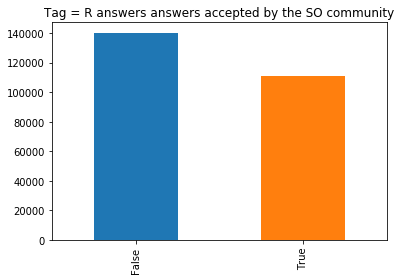

In [5]:
# Exploratory Data Analysis 

answers_accepted = pd.Series(r_answers.IsAcceptedAnswer).value_counts()
answers_accepted.plot.bar(title = "Tag = R answers answers accepted by the SO community")

Let's now look at the words in the dataset of answers accepted.

Split dataset into two one with accepted answers and the other not accepted

In [6]:
answers = r_answers[["IsAcceptedAnswer", "Body"]]
accepted = answers.loc[answers["IsAcceptedAnswer"] == True]
notaccepted = answers.loc[answers["IsAcceptedAnswer"] == False]

Use Python's nltk library and functions to word tokenize the corpus of text from each group

In [7]:
corpus_accepted = " ".join(accepted.Body)
corpus_accepted = corpus_accepted.decode('utf-8')
accepted_tokens = nltk.word_tokenize(corpus_accepted) # tokenize the string

corpus_notaccepted = " ".join(notaccepted.Body)
corpus_notaccepted = corpus_notaccepted.decode('utf-8')
notaccepted_tokens = nltk.word_tokenize(corpus_notaccepted)

See how many words are in the accepted group and how many in the not accepted group

In [8]:
accepted_words = [w.lower() for w in accepted_tokens]
notaccepted_words = [w.lower() for w in notaccepted_tokens]

print "Number of words in the accepted group: %d " % (len(accepted_words))
print "Number of unique words in accepted group %d " % (len(set(accepted_words)))
print
print "Number of words in the not accepted group: %d " % (len(notaccepted_words))
print "Number of unique words in not accepted group %d " % (len(set(notaccepted_words)))

Number of words in the accepted group: 15746436 
Number of unique words in accepted group 146007 

Number of words in the not accepted group: 16679834 
Number of unique words in not accepted group 148165 


We see that more words are used in the not accepted group. This could be that there are more not accepted answers. Note that just because a answer is not accepted is not necessarily bad; it's just not voted by users but can have a high score.

Now to make a frequency distribution and see the top 200 words in each group.

In [9]:
# now make a frequency distribution of words for each group
fdist_accepted = nltk.FreqDist(accepted_words)
fdist_notaccepted = nltk.FreqDist(notaccepted_words)
most_accepted_200 = fdist_accepted.most_common(200)
most_notaccepted_200 = fdist_notaccepted.most_common(200)

In [10]:
for word, frequency in most_accepted_200:
    print word, frequency

code 1008670
p 686106
the 449219
pre 375733
a 318117
lt 315642
to 240230
x 208037
you 182438
data 167443
i 160879
is 148399
c 148210
in 145763
of 143806
gt 128577
and 127638
df 107643
as 97911
for 96242
this 92672
na 88771
function 86320
y 86223
it 84589
that 81470
with 74647
r 73523
can 68534
if 67815
b 64612
your 61743
l 59848
s 59694
t 59134
by 58240
use 56080
list 53639
d 53167
frame 51054
be 50388
n 47643
true 46128
com 45854
library 44172
are 43989
not 43638
https 43572
here 41719
v 39836
value 39789
table 39021
m 39002
id 38853
from 38742
on 38633
do 38142
e 36341
names 36281
which 35753
false 35006
or 34741
using 34442
strong 34409
href 33322
plot 33017
but 32057
date 31521
have 31477
all 31003
f 30860
li 30758
then 30096
so 30070
will 29132
length 29072
we 28817
stack 28700
an 27896
h 27336
name 26850
imgur 26808
rel 26608
png 26429
group 26411
get 26375
ggplot 26251
values 26250
geom 26008
matrix 25814
time 25622
em 25070
one 24986
want 24810
column 24788
col 24369
text 24290

In [11]:
for word, frequency in most_notaccepted_200:
    print word, frequency

code 942194
p 749681
the 463927
pre 395239
a 359196
lt 336021
to 256775
x 213534
you 195151
i 186939
data 184077
c 161180
is 159535
in 158428
of 152635
gt 141112
and 140589
df 123068
for 108578
as 104856
this 104250
it 95487
function 93172
na 92256
r 89344
that 86276
with 82348
y 82142
if 76337
b 73062
can 72500
l 69290
your 66493
s 65836
t 64410
by 60450
use 58452
d 56878
frame 56344
be 56202
list 53655
n 50489
library 50465
true 49341
not 48682
are 45858
table 45153
v 43857
com 43486
from 42601
on 42379
m 41668
here 41559
id 41475
do 41153
using 40426
https 40241
value 39379
which 39363
but 39292
href 38122
names 37795
or 37599
e 37186
have 36301
false 35902
strong 34195
date 33822
li 33286
all 33276
then 33257
f 32726
length 32553
an 31473
will 31276
rel 31048
so 29864
nofollow 28598
time 28509
matrix 28296
plot 27997
file 27609
name 27301
one 27276
get 27044
want 26521
group 25859
package 25810
col 25509
h 25484
values 25251
like 24743
em 24642
column 24449
first 24441
example 2397

What is most interesting about the two frequency lists is that regardless of the answer someone puts using the 'R' tag, the top 9 words have the same order. Code is the top word which makes sense if one is asking a R question.

Let's look at how many words appear in both groups. We'll use the idea of intersection in Set Theory to accomplish this that is 

Accepted $\cap$ NotAccepted

In [12]:
print len(set(notaccepted_words).intersection(accepted_words))

66010


Let's now do a t-test of the two groups of frequency distributions and see if they are similar or not.

In [13]:
a_rel_frequency = [fdist_accepted[freq] for freq in fdist_accepted]
na_rel_frequency = [fdist_notaccepted[freq] for freq in fdist_notaccepted]

# let's now do a t-test to see how similar are these two groups are
t_test_answers = scipy.stats.ttest_ind(na_rel_frequency, a_rel_frequency, equal_var=False)
print "t-test results for the accepted answers and not accepted t-statistic and p-value: %.4f %.4f" % (round(t_test_answers.statistic,4), round(t_test_answers.pvalue, 4))

t-test results for the accepted answers and not accepted t-statistic and p-value: 0.3030 0.7619


With such a high p-value, we see that we fail to reject the null hypothesis that is the difference in means is $\neq 0$ and there is a difference between the two means of the groups and not statistically significant.

Most would think that the means would not be equal as we are dealing with two types of answers; accepted by the answers community and those that are not.

Different frequency distributions also show this case as for one the sample sizes are different, and different words could appear in the answers in either group or both and if even both, may not have the same frequency count.

Now let's turn to the second question to be asked:

## Who are the top users with the most accepted answers?

Let's use a network graph to solve this problem and see visually. I'll use Gephi to load the graph.

Nodes: Answer id's (Id)

Directed Edge: An edge is if the answer Id answered a question identified by ParentId

Id --> ParentId

Edge Weight: Score of the answer (Score)

Edge Attribute: Answer Owner Id (id of account OwnerUserId)


In [14]:
# convert these to str objects so they can be loaded properly when building the directed weighted graph
r_answers['ParentId'] = r_answers['ParentId'].apply(str)
r_answers['Id'] = r_answers['Id'].apply(str)
r_answers['OwnerUserId'] = r_answers.OwnerUserId.apply(str)
r_answers['OwnerUserId'] = r_answers.OwnerUserId.str.replace('.0', '')
r_answers['OwnerUserId'] = r_answers.OwnerUserId.str.replace('nan', '-1') # -1 if it doesn't exist

top_accepted = r_answers.loc[r_answers.IsAcceptedAnswer == True]

# make the directed graph
DG = nx.from_pandas_edgelist(top_accepted, 'Id', 'ParentId', ['Score', 'OwnerUserId'],
                             create_using = nx.DiGraph())

# example of data in the graph
print "number of nodes: %d" % (len(DG.nodes()))
print "number of edges: %d" % (len(DG.edges()))
print "Number of Answered questions that were accepted: %d" % (len(top_accepted.Id))

number of nodes: 221058
number of edges: 110529
Number of Answered questions that were accepted: 110529


There are twice as many nodes as there are edges

Our Directed Weighted graph has been constructed, let's do some statistics

In [15]:
print "Density of the graph: %f" % (nx.density(DG))

Density of the graph: 0.000002


Let's look at the nodes with a high in-degree and examine their graph structure.

In [16]:
indegree_dist = {}
for i in pd.unique(top_accepted.Id):
    indegree_dist[i] = DG.out_degree(i)

#plt.hist(indegree_dist.values())
print "Max in-degree: %d" % (max(indegree_dist.values()))
print "Min in-degree: %d" % (min(indegree_dist.values()))

# example of using 500 nodes; make a subgraph


Max in-degree: 1
Min in-degree: 1


# Summary

- I've examined the corpus of 'R' tag of StackOverflow answers and saw that the top 9 most common words are essentially the same in both groups. Using a t-test, we saw that by failing to reject the null hypothesis, the two groups are not statistically significant.

- So based on this analysis, it seems that all the answers were the top answer to their respective questions. This would make sense as if people accept the answer of a R Stack Overflow question, chances are other people won't chime in on the question as it has widely been accepted by many SO users.

- Even though having a graph with half of the node with a in-degree may not seem like insight, we can examine using visualizing software how the network graph looks in regards to answer scores and see if there is a trend amongst users as well as the question being asked.

- Future things to attempt or investigate are

    1. Given a answer to a question, can we classify if it will be accepted by the SO community or not?
        
    2. Do the same or similar analysis but for questions instead. What network graph visualization will be different than those of answers?
        
    3. What other trends in 'r' tag SO questions are also mostly used and perform network analysis based on different tags.
    
    4. Do the same text processing but search for html tags to see which is most popular and if it affects answer scores or not.

In [17]:
nx.write_gexf(DG, "R_SO_Answers_Graph.gexf")